# Some plots

It is not neccessary to read this notebook it has been created just for convenience, and it contains the functions used to generate the various plots/tables

In [1]:
import pandas as pd
# Group by problem, remove min and max, then compute average
def trimmed_mean_and_variance(group: pd.DataFrame) -> pd.Series:
	times = group["time"].sort_values()
	# Remove min and max
	trimmed = times.iloc[1:-1]
	return pd.Series({
		"mean": trimmed.mean(),
		"variance": trimmed.var()
	})

## Load and compute various times

In [2]:
df = pd.read_csv("results/sequential_results.csv")
# Make an average of the time for each problem
sequential_times = df.groupby("problem").apply(trimmed_mean_and_variance).reset_index()
print(sequential_times)

        problem      mean  variance
0    big_files/  21.26342  0.227912
1  mixed_files/  21.10166  3.432848
2  small_files/  24.40070  0.066238


In [3]:
df = pd.read_csv("results/parallel_results.csv")
# Group by problem and number of threads, remove min and max, then compute average
parallel_times = df.groupby(["problem", "threads"]).apply(trimmed_mean_and_variance).reset_index()
print(parallel_times)

         problem  threads       mean  variance
0     big_files/        2  11.996940  0.029645
1     big_files/        4   7.215630  0.043508
2     big_files/        8   4.580840  0.035678
3     big_files/       10   4.076196  0.005582
4     big_files/       12   3.859168  0.194837
5     big_files/       14   4.549920  1.746309
6     big_files/       16   3.328910  0.065370
7     big_files/       18   3.544274  0.026964
8     big_files/       20   3.748170  0.135787
9     big_files/       22   3.660914  0.144240
10    big_files/       24   3.701010  0.030204
11    big_files/       28   4.112434  0.588062
12    big_files/       30   4.888850  2.490909
13    big_files/       32   3.557644  0.166328
14  mixed_files/        2  12.935760  4.470279
15  mixed_files/        4   6.440596  0.064515
16  mixed_files/        8   4.211266  0.118619
17  mixed_files/       10   3.723488  0.132959
18  mixed_files/       12   3.641834  0.138170
19  mixed_files/       14   3.525252  0.219283
20  mixed_fil

## Plots for normal program

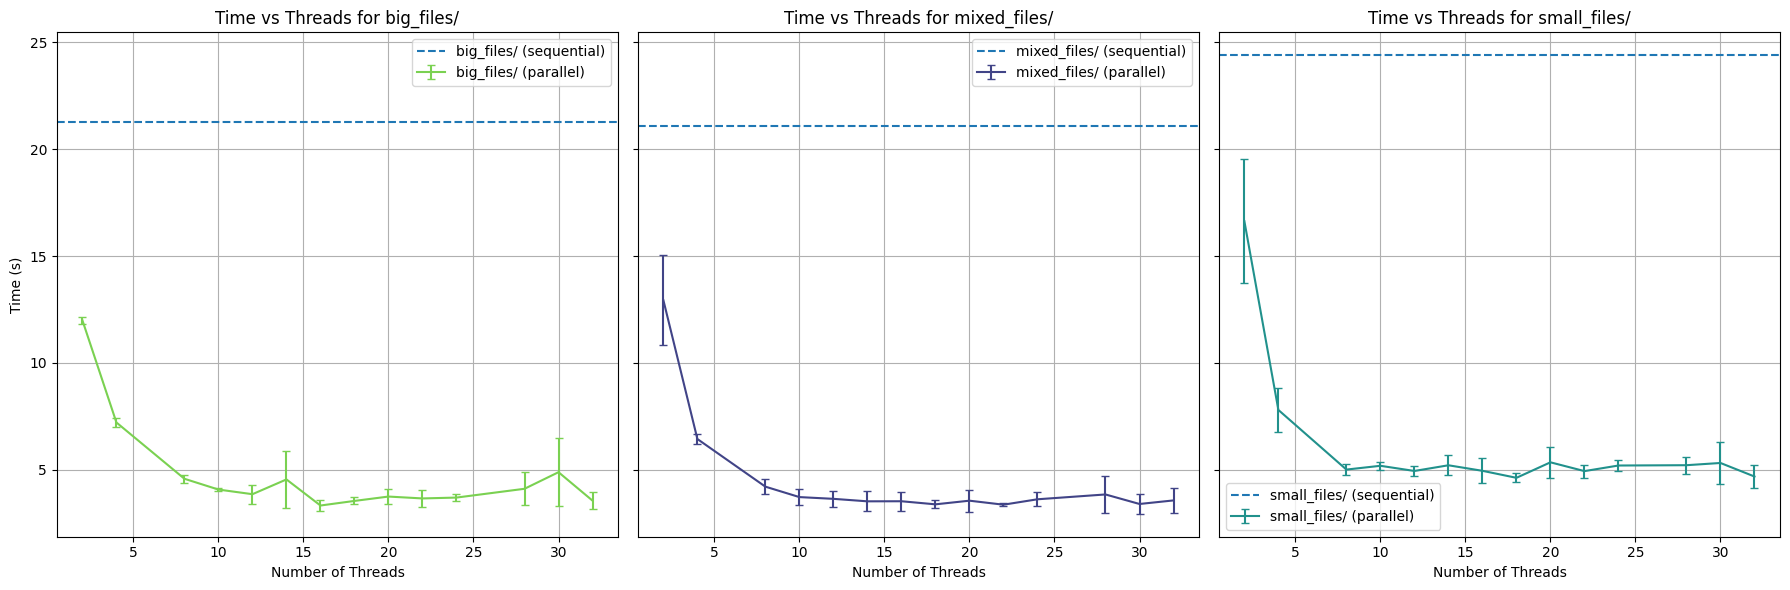

In [4]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

color_map = {
	"mixed_files/": plt.cm.viridis(0.2),
	"small_files/": plt.cm.viridis(0.5),
	"big_files/": plt.cm.viridis(0.8)
}

# Iterate over each problem and create a separate plot
for ax, problem in zip(axes, parallel_times['problem'].unique()):
	subset = parallel_times[parallel_times['problem'] == problem]
	ax.errorbar(subset['threads'], subset['mean'], yerr=subset['variance']**0.5, label=f"{problem} (parallel)", capsize=3, color=color_map[problem])
	
	# Add a horizontal line for sequential times with the same color
	seq_row = sequential_times[sequential_times['problem'] == problem].iloc[0]
	ax.axhline(y=seq_row['mean'], linestyle='--', label=f"{problem} (sequential)")
	
	# Add labels, title, and legend
	ax.set_xlabel('Number of Threads')
	ax.set_title(f'Time vs Threads for {problem}')
	ax.legend()
	ax.grid(True)

# Set a common ylabel
axes[0].set_ylabel('Time (s)')
# Adjust layout and show the plot
plt.tight_layout()
# savefig as PNG
plt.savefig("figures/par_time_.png", dpi=600)
plt.show()


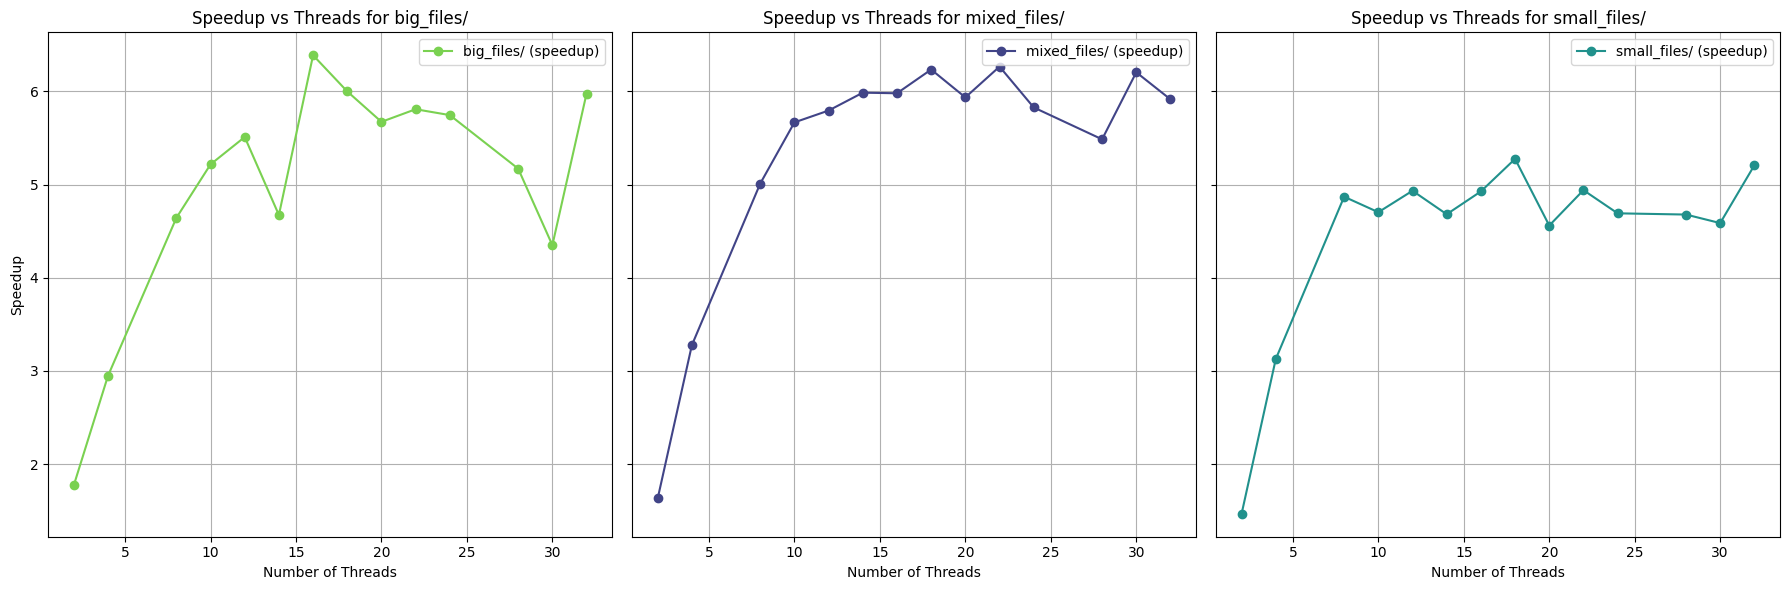

In [10]:
# Create a figure with 3 subplots side by side for speedups
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterate over each problem and create a separate plot for speedups
for ax, problem in zip(axes, parallel_times['problem'].unique()):
	subset = parallel_times[parallel_times['problem'] == problem].copy()  # Use .copy() to avoid the warning
	seq_row = sequential_times[sequential_times['problem'] == problem].iloc[0]
	
	# Calculate speedup
	subset.loc[:, 'speedup'] = seq_row['mean'] / subset['mean']
	
	# Plot speedup
	ax.plot(subset['threads'], subset['speedup'], marker='o', label=f"{problem} (speedup)", color=color_map[problem])
	
	# Add labels, title, and legend
	ax.set_xlabel('Number of Threads')
	ax.set_title(f'Speedup vs Threads for {problem}')
	ax.legend()
	ax.grid(True)

# Set a common ylabel
axes[0].set_ylabel('Speedup')
# Adjust layout and show the plot
plt.tight_layout()
# Save the figure as PNG
plt.savefig("figures/speedup_plot.png", dpi=600)
plt.show()